## EDAV 5702 Community Contribution

## Lin Gong, Victoria Xu

## I. Introduction


Python and R are two of the fundamental programming languages for data science. There are a lot of similarities between these two languages. And success in data science depends on the flexible and appropriate use of both tools. However, transitions from R to Python and vice versa in terms of plotting might not be easy. Therefore we hope to use our experience in Python to help people create ggplot visualization in Python easier. We will use plotnine and seaborn to visualize the following datasets. Plotnine aims to provide a near-identical API to ggplot2 so that R users who are new to python would find it familiar and easy to use. Seaborn is a Python data visualization library based on matplotlib, which is not as intuitive as plotnine, but easier to create visually appealing graphs.

For plotnine, the main components and rules of grammar of graphics and how to use them to create data visualizations are as follows:
Data -- the information to use when creating the plot;
Aesthetics (aes) -- provides a mapping between data variables and aesthetic, or graphical, variables used by the underlying drawing system;
Geometric objects (geoms) -- defines the type of geometric object to use in the drawing. geom_* classes determine the kind of geometric objects, and every plot must have at least one geom added to it.

In [1]:
# !pip install ggplot
# !pip install plotnine

In [2]:
#import packages
from plotnine.data import economics, mpg, huron
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## II. Examples

In [3]:
huron.head()

,year,level,decade
0,1875,580.38,1870
1,1876,581.86,1870
2,1877,580.97,1870
3,1878,580.80,1870
4,1879,579.79,1870


**The dataset that we used is a description of the annual measurements of the level, in feet, of Lake Huron.**

### **Histrogram**

- Using plotnine

In [4]:
from plotnine import ggplot, aes, stat_bin, geom_histogram

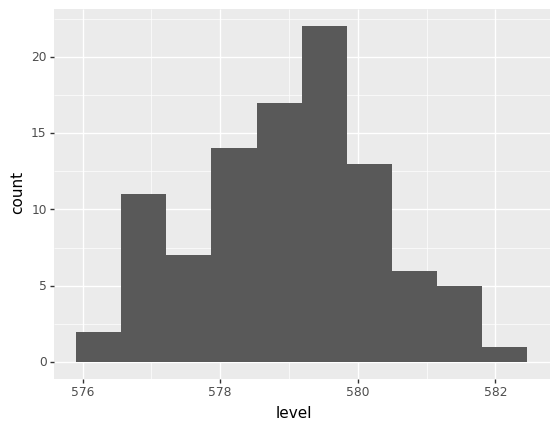

<ggplot: (8783065161051)>

In [5]:
ggplot(huron) + aes(x="level")+ geom_histogram(bins=10)

**For most common tasks, such as building histograms, plotnine includes very convenient functions that make the code more concise: this plot shows the number of measurements for each range of lake levels. Note that we need to use quotes when specifying the attribute name we want to plot.**

- Using seaborn

<AxesSubplot: xlabel='level', ylabel='Count'>

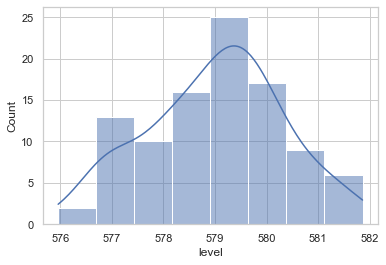

In [6]:
sns.set_theme(style="whitegrid")
sns.histplot(data=huron,x="level",kde=True)

### **Box Plot**

- Using plotnine

In [7]:
from plotnine import ggplot, aes, geom_boxplot

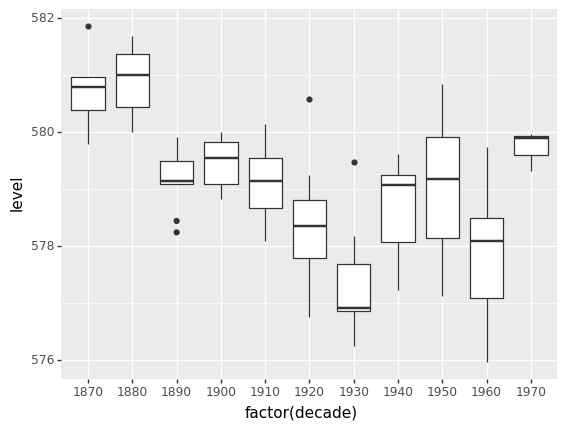

<ggplot: (8783072551412)>

In [8]:
(
  ggplot(huron)
  + aes(x="factor(decade)", y="level")
  + geom_boxplot()
)

**This code groups the data rows by decade using factor() and then uses geom_boxplot() to create the box plots. This is really convenient as it makes our code more concise. Using geom_boxplot() can take care of calculating the quartiles and outliers.**

- Using seaborn

<AxesSubplot: xlabel='decade', ylabel='level'>

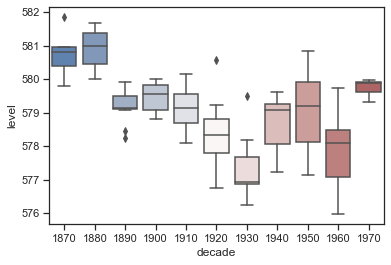

In [9]:
sns.set_theme(style="ticks")

sns.boxplot(data=huron,x="decade",y="level", palette="vlag")

### **Violin Plot**

In [10]:
from plotnine import geom_violin

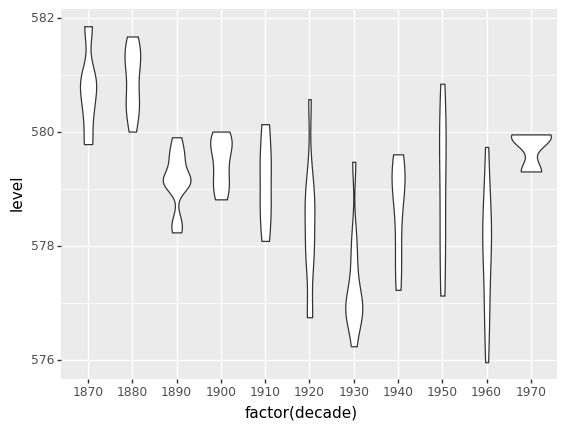

<ggplot: (8783072858323)>

In [11]:
ggplot(huron, aes(x="factor(decade)", y="level")) + \
    geom_violin() 

- Using seaborn

<AxesSubplot: xlabel='decade', ylabel='level'>

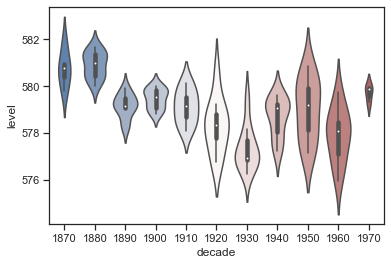

In [12]:
sns.violinplot(data=huron,x="decade",y="level", palette="vlag",scale="count")

### **Facet Wrap**

In [13]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


**For the plots below, we use this data which is a description of fuel economy data for a range of vehicles.**

- Using plotnine

In [14]:
from plotnine import ggplot, aes, facet_grid, labs, geom_point, theme_dark

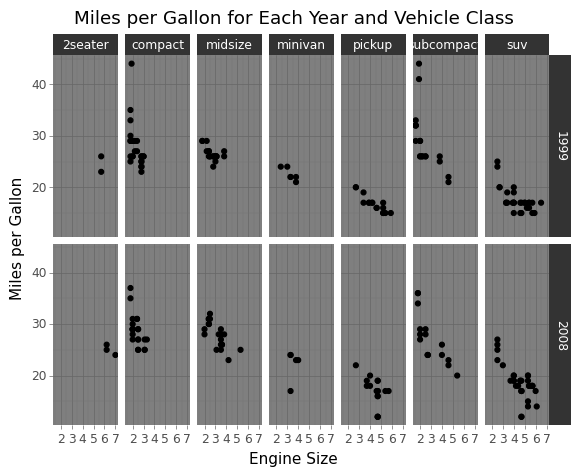

<ggplot: (8783072396999)>

In [15]:
(
    ggplot(mpg)
    + facet_grid(facets="year~class")
    + aes(x="displ", y="hwy")
    + labs(
        x="Engine Size",
        y="Miles per Gallon",
        title="Miles per Gallon for Each Year and Vehicle Class",
    )
    + geom_point()
    + theme_dark()
)

**Note that if we specify theme_dark(), it allows plotnine to draw the plot using a dark theme which differs from previous default theme.**

- Using seaborn

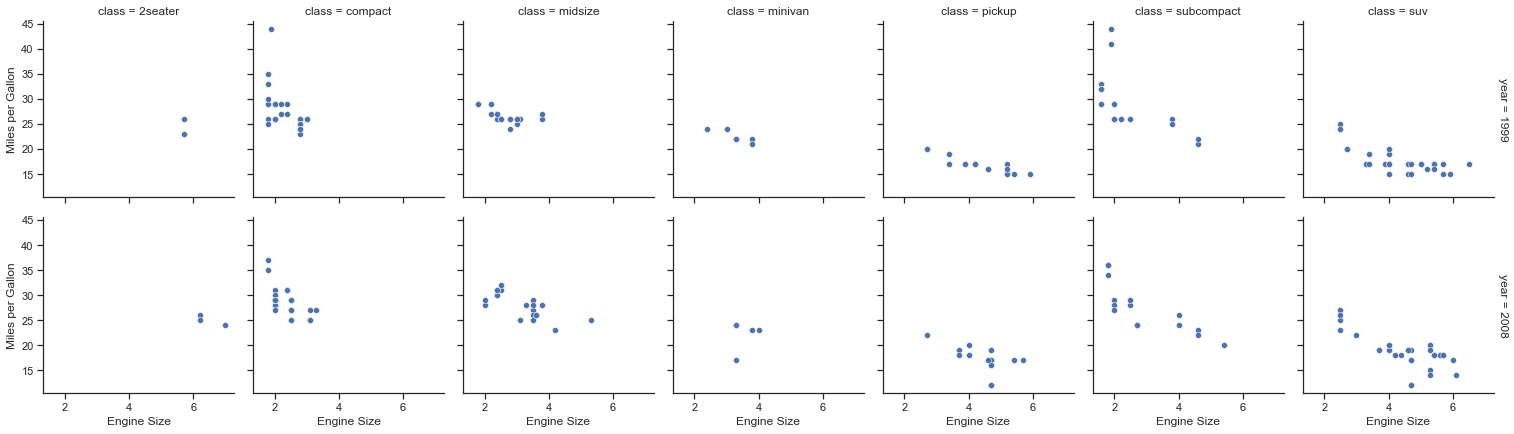

In [16]:
g = sns.FacetGrid(mpg, col="class", row="year", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="displ", y="hwy")
g.set_axis_labels("Engine Size", "Miles per Gallon")
g.set_titles(template="Miles per Gallon for Each Year and Vehicle Class")

### **Density Plot**

- Using plotnine

In [17]:
from plotnine import geom_density

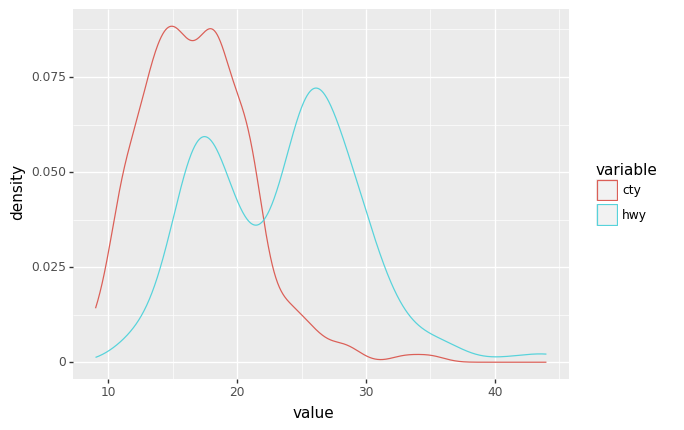

<ggplot: (8783074542409)>

In [18]:
mpg_new = pd.melt(mpg[['hwy', 'cty']])

ggplot(mpg_new , aes(x='value', color='variable')) + \
    geom_density()

- Using seaborn

<AxesSubplot: xlabel='value', ylabel='Density'>

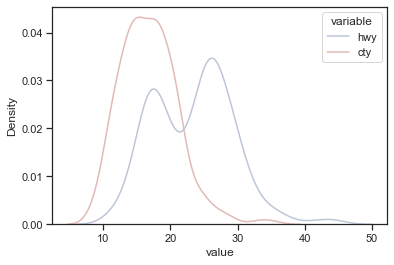

In [19]:
sns.kdeplot(data=mpg_new,x="value",hue="variable", palette="vlag")

**When it come to complex datasets, we sometimes want multivariate views to better understand the information from the data**

In [20]:
penguins = sns.load_dataset("penguins")

In [21]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


- Using seaborn

**Seaborn is very clean and easy to use to observe the relationship between single pair of variables and all pairwise relationship between each variables.** 

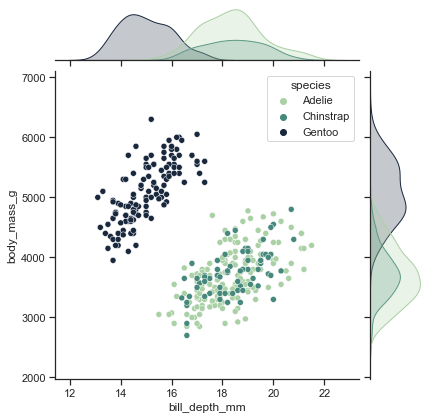

In [22]:
sns.jointplot(data=penguins, x="bill_depth_mm", y="body_mass_g", hue="species",palette="ch:r=-.5,l=.75")

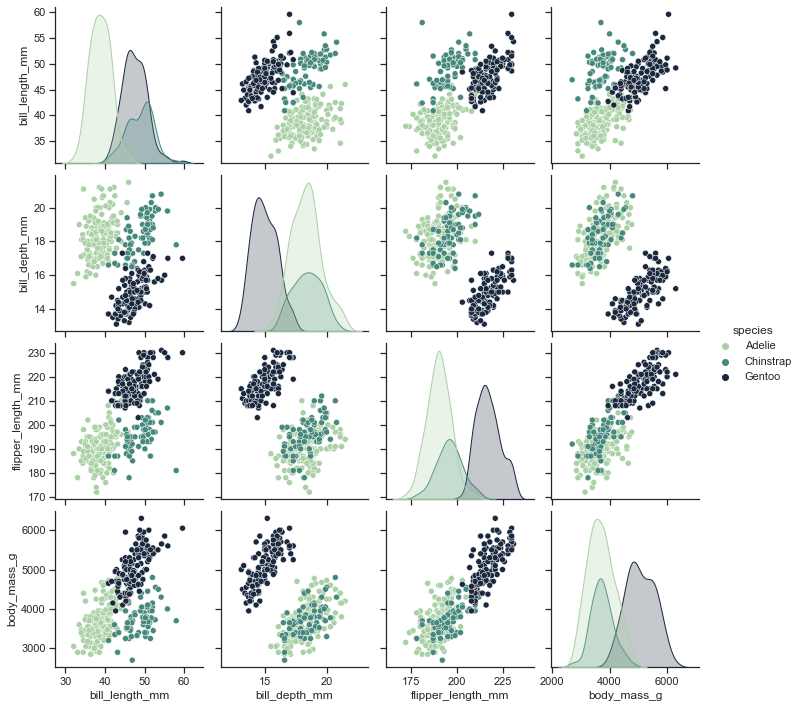

In [23]:
sns.pairplot(data=penguins, hue="species",palette="ch:r=-.5,l=.75")

### **Conclusion**

Using ggplot in Python allows us to build data visualizations in a very concise and consistent way. We can create complex plots with a few lines of code using plotnine. In this project we learned how to: Install plotnine and Jupyter Notebook; Combine different elements of the grammar of graphics; And use plotnine to create visualizations in an efficient and consistent way. As we can see, plotnine is more intuitive, and is more friendly to R users. It provides a near-identical API to ggplot2 so people who are new to python would find it familiar and easy to use. On the other hand, even though seaborn is not as intuitive as plotnine, it is easier to create visually appealing graphs.